In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
import pandas as pd

# Load Data

In [2]:
def load_d1():
    df = pd.read_csv('dataset/Dataset-1.csv')
    text= df.Text.str.cat(sep=',').lower()
    return text

def load_d2():
    with open('dataset/Dataset-2.txt','r') as f:
        text = f.readlines()
    text = " ".join([x.strip().split(':',1)[1].lower() for x in text if ':' in x ])
    return text

# Text Pre-Processing

In [3]:
from nltk.tokenize import RegexpTokenizer

def pre_processing(text):

    words = set(nltk.corpus.words.words())
    english_words = [w for w in nltk.wordpunct_tokenize(text) if w.lower() in words]
    
    stop_words = set(stopwords.words('english'))
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(" ".join(english_words))
    words = [w for w in word_tokens if w not in stop_words]
    return words

# Top N Bi-Grams

In [4]:
def top_N_bigrams(words, measure, freqType, N):
    
    finder = BigramCollocationFinder.from_words(words)
    scores = finder.score_ngrams(measure)[:N]
    
    with open('output/{0}.txt'.format(freqType), 'w') as my_file:
        my_file.write('***************************************************************************************************************\n')
        my_file.write('\t '+ 'Bigram '+'\t\t\t\t|\t\t\t '+freqType+'\n')
        my_file.write('***************************************************************************************************************\n')
        for pair in scores:
            my_file.write('\t ' + str(pair[0]) + '\t\t\t|\t\t\t ' + str(round(pair[1],6))+'\n')
        my_file.write('---------------------------------------------------------------------------------------------------------------\n')
    return scores

# Data Visualization

In [5]:
import matplotlib.pyplot as plt
def plot_freqs(scores,dataset, label,seed, *args, **kwargs):
    fig = plt.figure(figsize=(35,15))
    ax = fig.add_subplot(seed)
    plt.plot([freq[1] for freq in scores], 'ro')
    plt.ylabel(label, fontsize=20)
    plt.title('{0}: {1}'.format(dataset, label), fontsize=22)
    itr=0
    if kwargs.get('annotate',None):
        for pair in scores:
            itr=itr+1
            ax.annotate(pair[0], xy=[itr, pair[1]], textcoords='data', fontsize=20)
    
    plt.gca().set_position([0, 0, 1, 1])
    fig.savefig('output/{0} - {1}.png'.format(dataset, label), dpi = 300)
    plt.show()
    plt.clf()

# Set up

In [6]:
from nltk.metrics import BigramAssocMeasures
import os
% matplotlib inline
def main():
    
    if not os.path.exists('output'):
        os.makedirs('output')
    
    text1 = load_d1()
    text2 = load_d2()

    words1 = pre_processing(text1)
    words2 = pre_processing(text2)
    
    # Task 1
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    # Dataset 1
    collection_freq1 = top_N_bigrams(words1, bigram_measures.raw_freq, 'Dataset 1 - Collection Frequency', 30)
    colloc_score1 = top_N_bigrams(words1, bigram_measures.pmi, 'Dataset 1 - Collocation Score', 30)
    
    plot_freqs(collection_freq1, 'Dataset 1', 'Collection Frequency', 111, annotate=True)
    plot_freqs(colloc_score1, 'Dataset 1', 'Collocation Score', 222)
    
    # Dataset 2
    collection_freq2 = top_N_bigrams(words2, bigram_measures.raw_freq, 'Dataset 2 - Collection Frequency', 30)
    colloc_score2 = top_N_bigrams(words2, bigram_measures.pmi, 'Dataset 2 - Collocation Score', 30)

    plot_freqs(collection_freq2, 'Dataset 2', 'Collection Frequency', 121, annotate=True)
    plot_freqs(colloc_score2, 'Dataset 2', 'Collocation Score', 212)

    # Task 2
    # Dataset 1
    plt.plot([freq[1] for freq in colloc_score1], [freq[1] for freq in collection_freq1], 'ro')
    plt.xlabel('Collocation Score of Dataset 1', fontsize=8)
    plt.ylabel('Frequency Score of Dataset 1', fontsize=8)
    plt.title('Frequency vs Collocation Score of Dataset 1', fontsize=12)
    plt.savefig('output/freq_vs_colloc_d1.png')
    plt.show()
    plt.clf()

    # Dataset 2
    plt.plot([freq[1] for freq in colloc_score2], [freq[1] for freq in collection_freq2], 'ro')
    plt.xlabel('Collocation Score of Dataset 2', fontsize=8)
    plt.ylabel('Frequency Score of Dataset 2', fontsize=8)
    plt.title('Frequency vs Collocation Score of Dataset 2', fontsize=12)
    plt.savefig('output/freq_vs_colloc_d2.png')
    plt.show()
    plt.clf()
    # Task 3
    # Dataset 1
    likelihood_ratio1 = top_N_bigrams(words1, bigram_measures.likelihood_ratio, 'Dataset 1 - Likelihood Ratio', 30)
    plot_freqs(likelihood_ratio1, 'Dataset 1', 'Likelihood Ratio', 122, annotate=True)
    
    # Dataset 2
    likelihood_ratio2 = top_N_bigrams(words2, bigram_measures.likelihood_ratio, 'Dataset 2 - Likelihood Ratio', 30)
    plot_freqs(likelihood_ratio2, 'Dataset 2', 'Likelihood Ratio', 221, annotate=True)


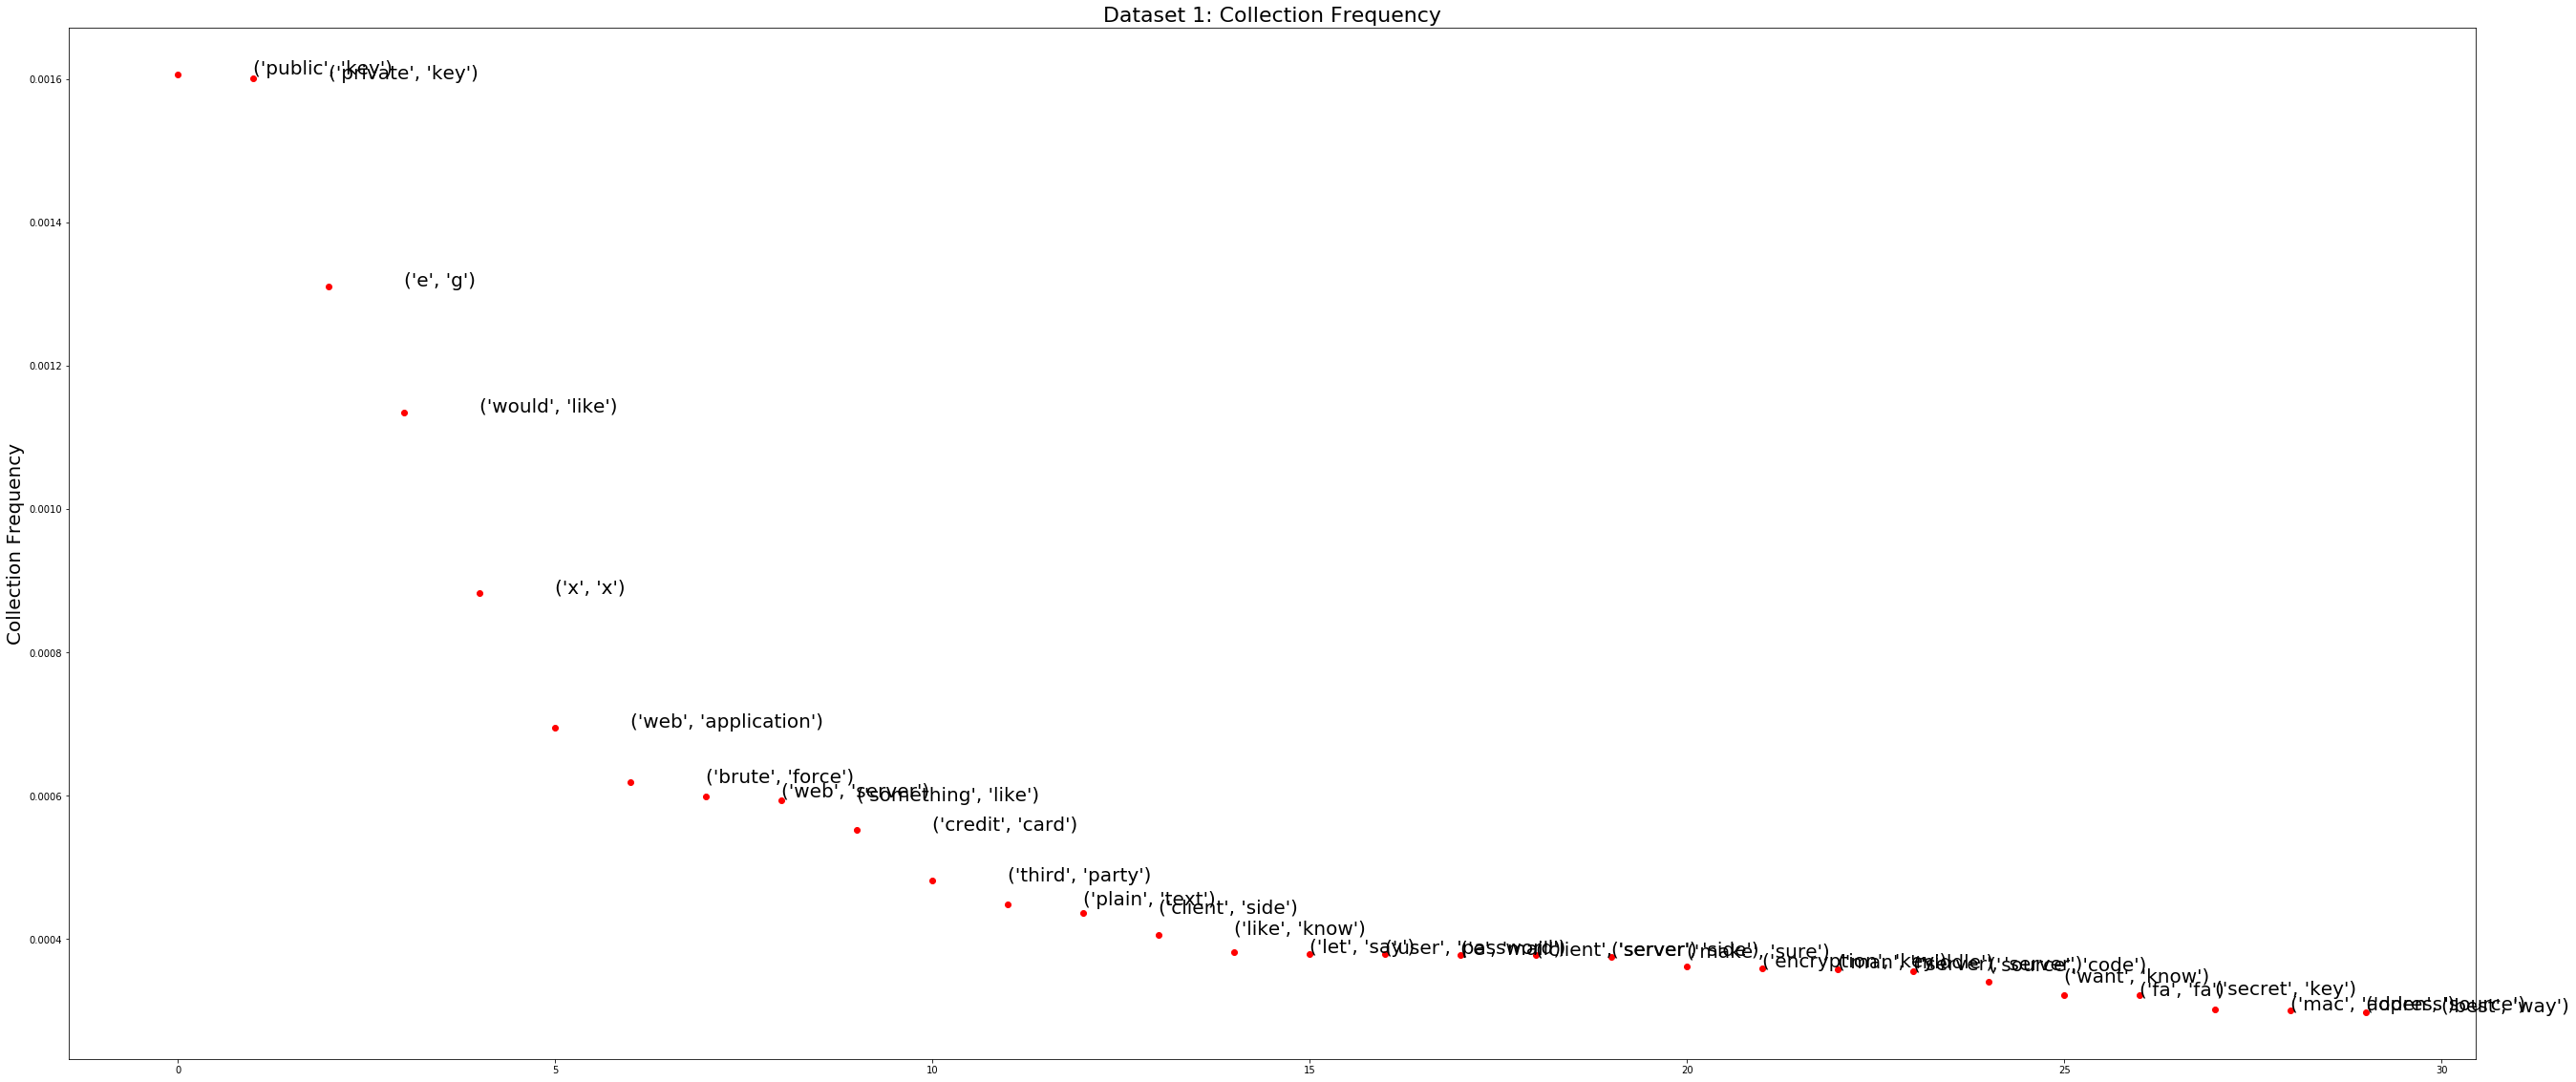

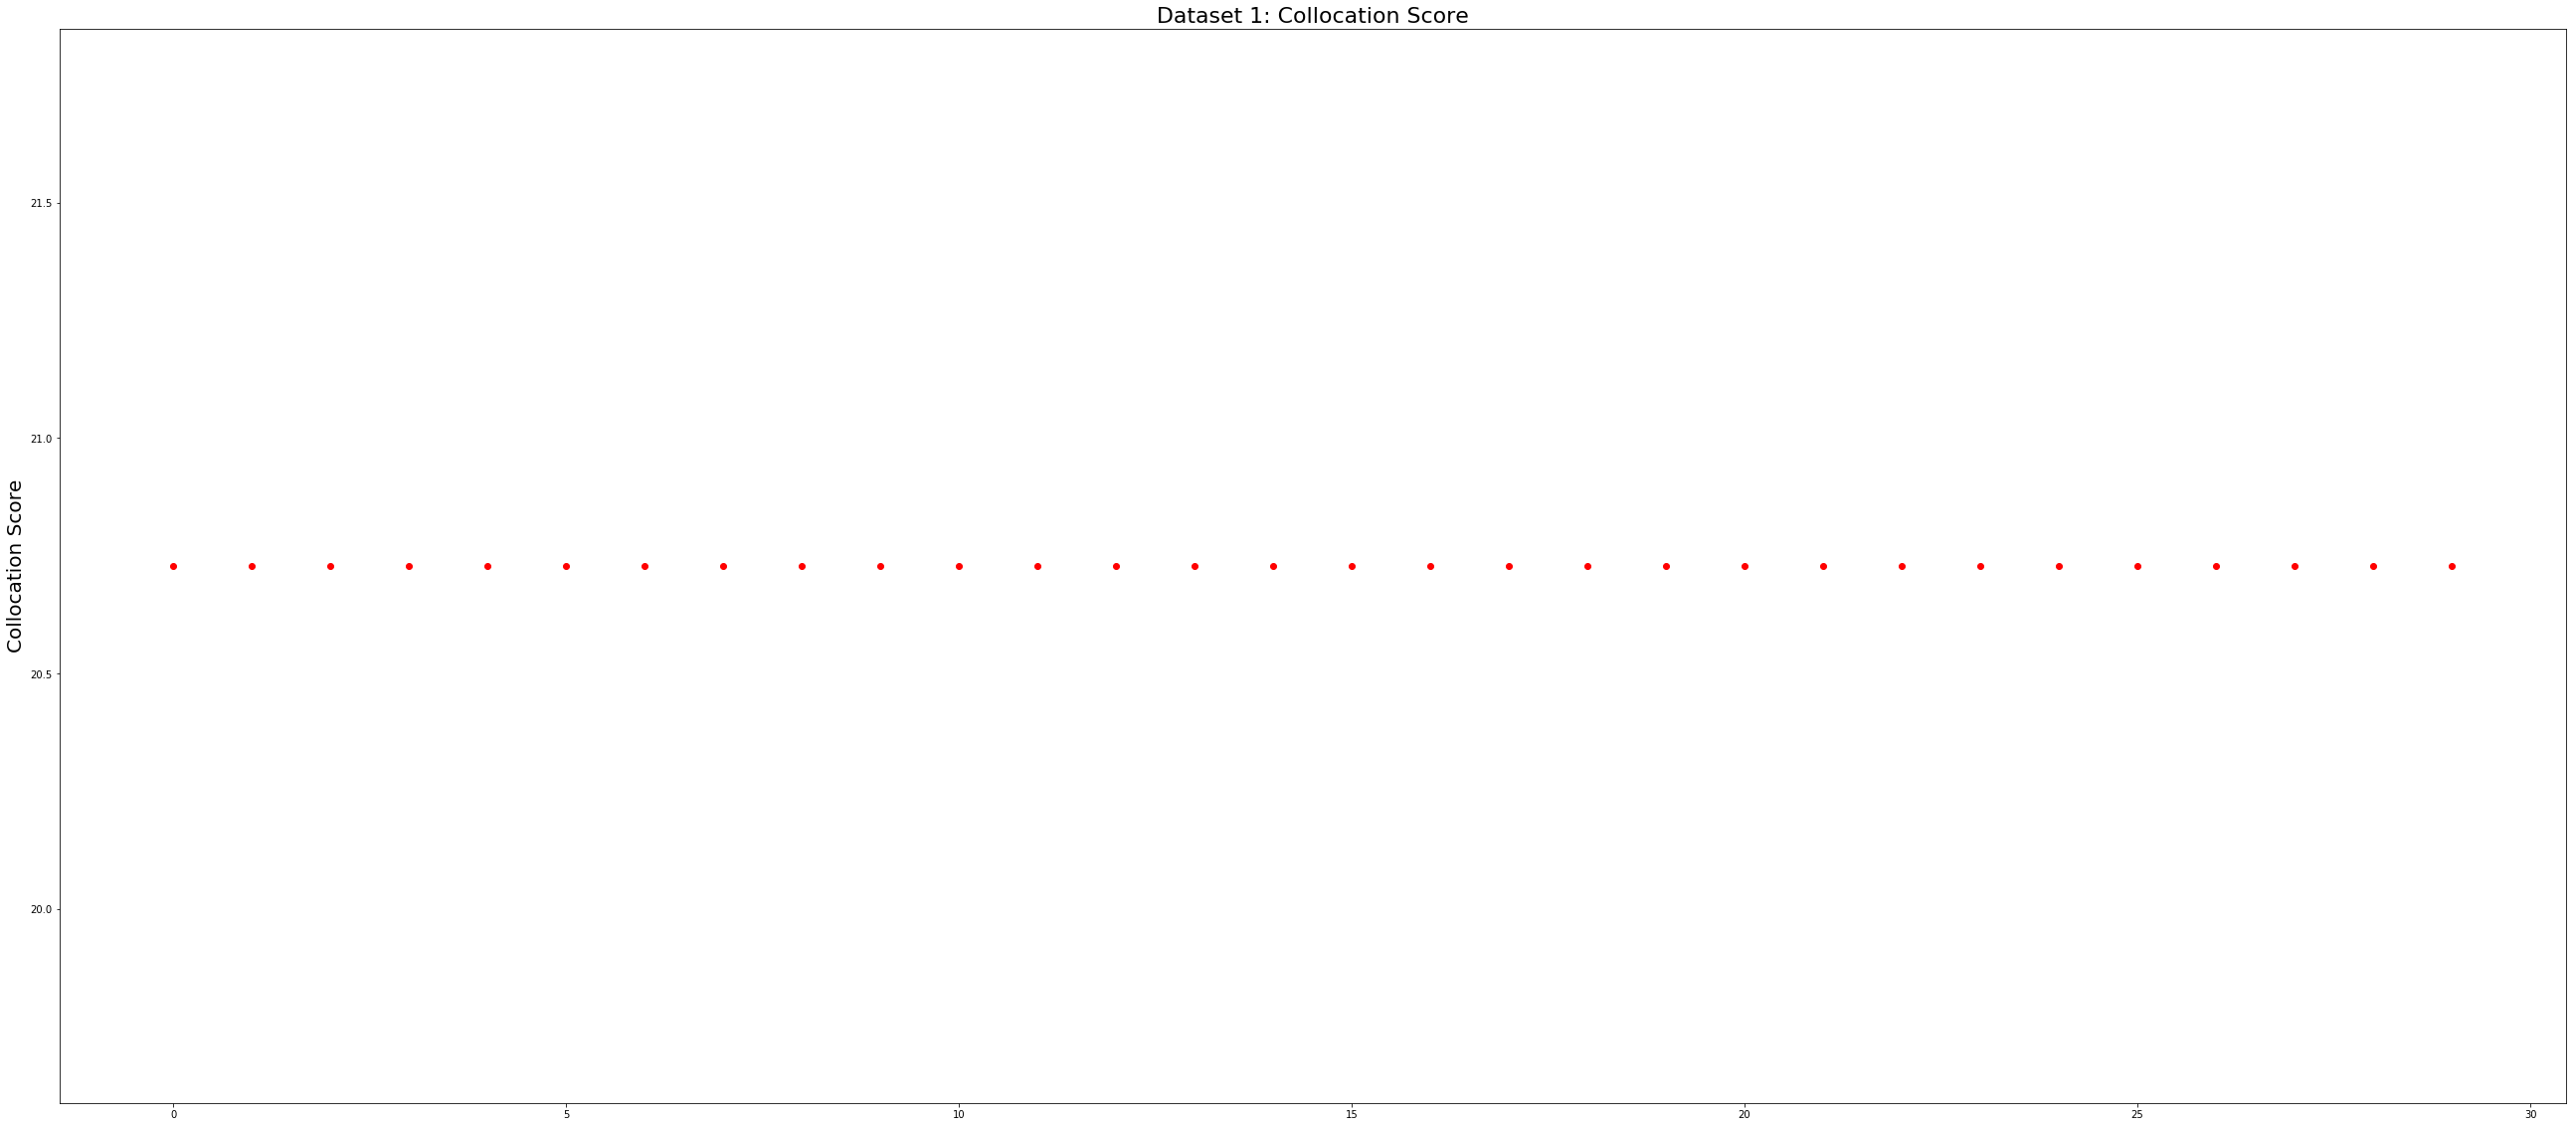

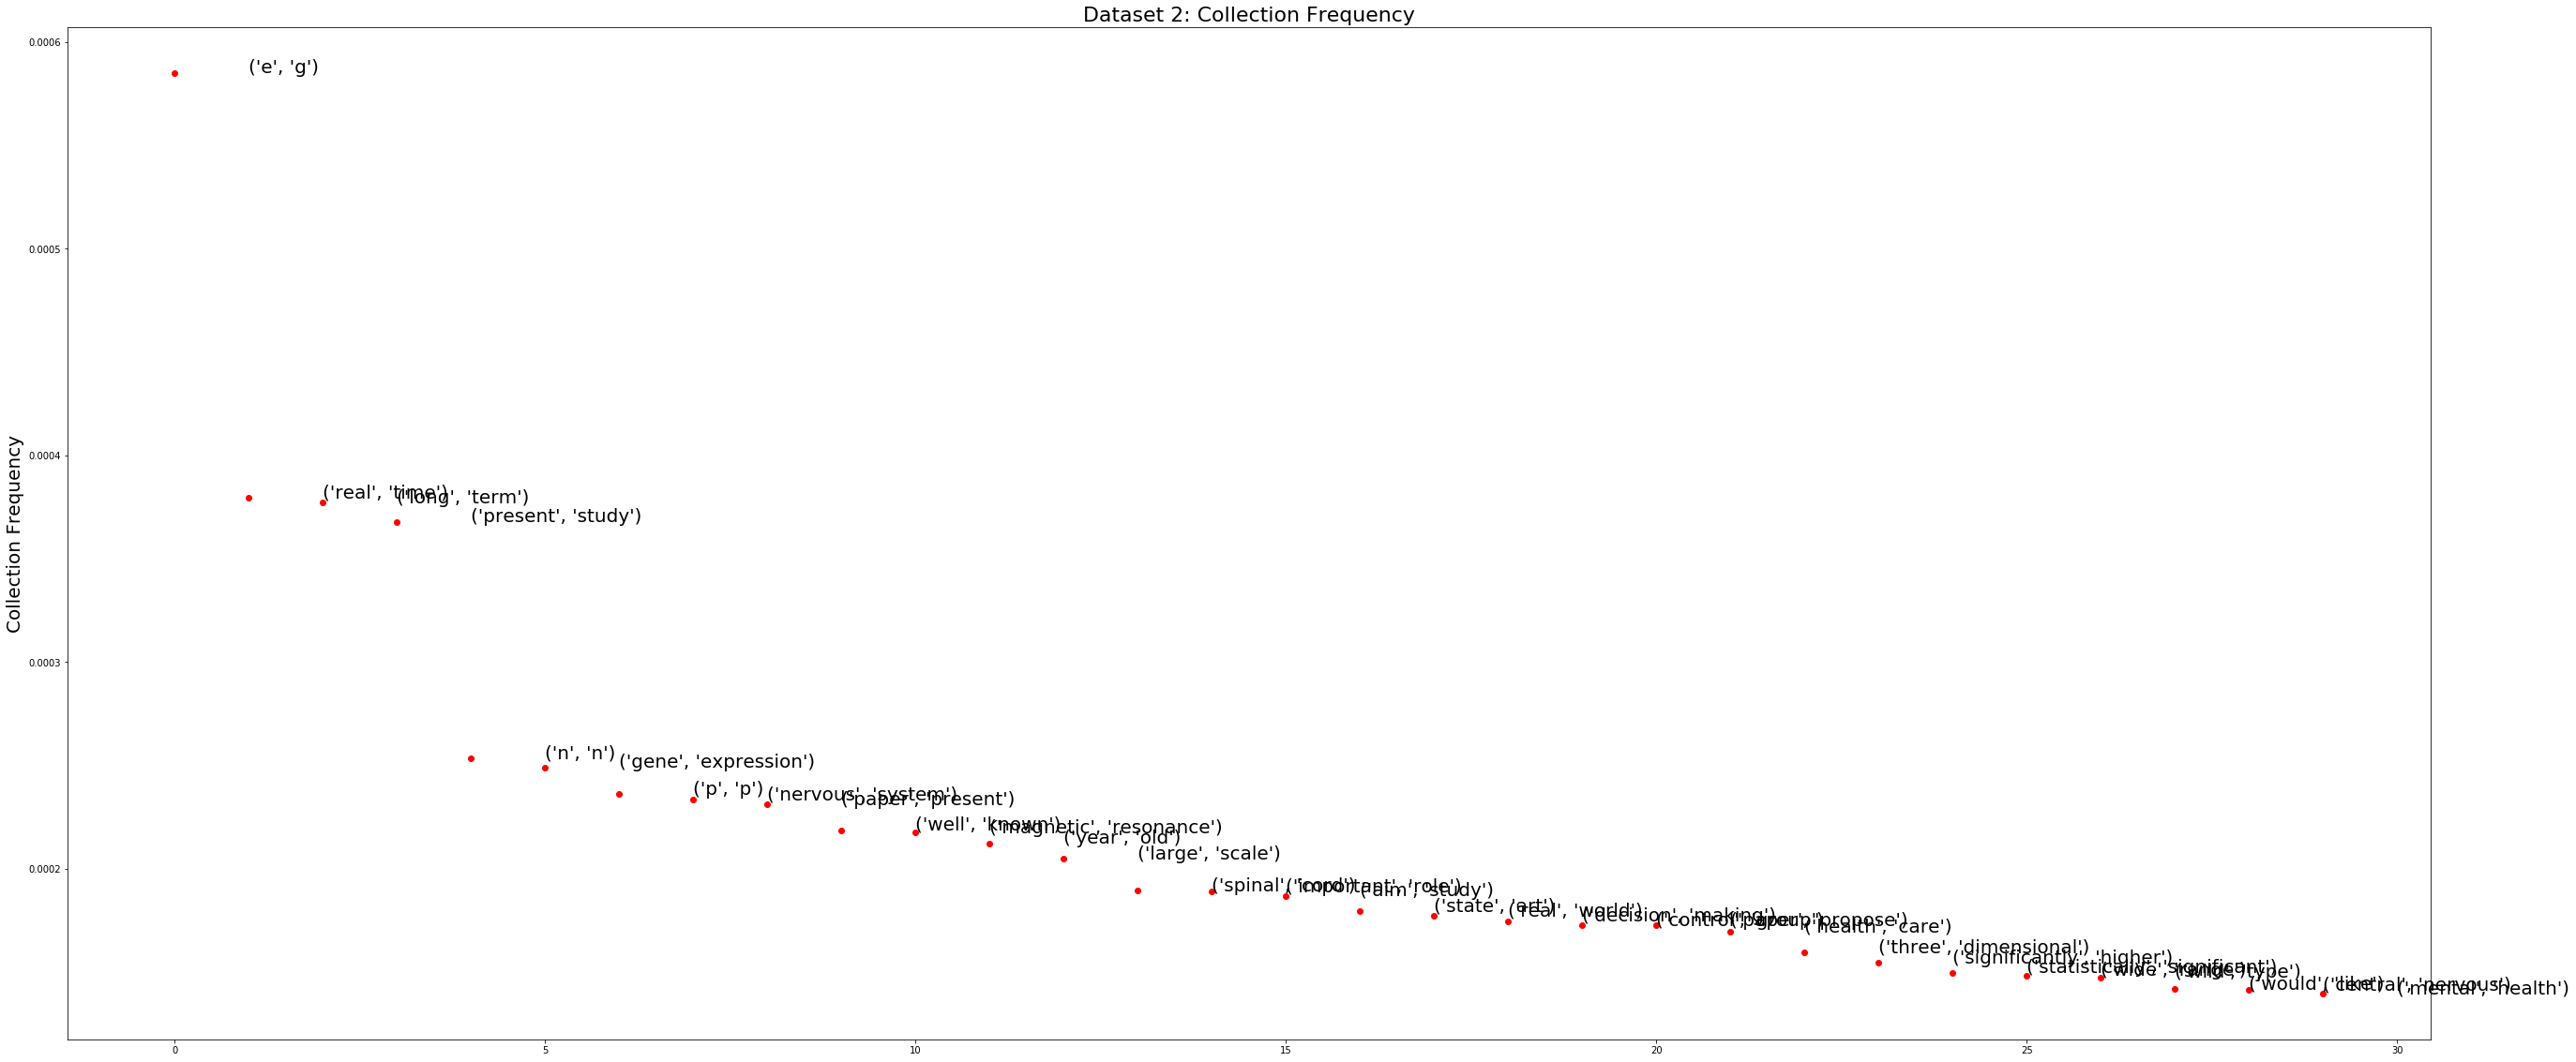

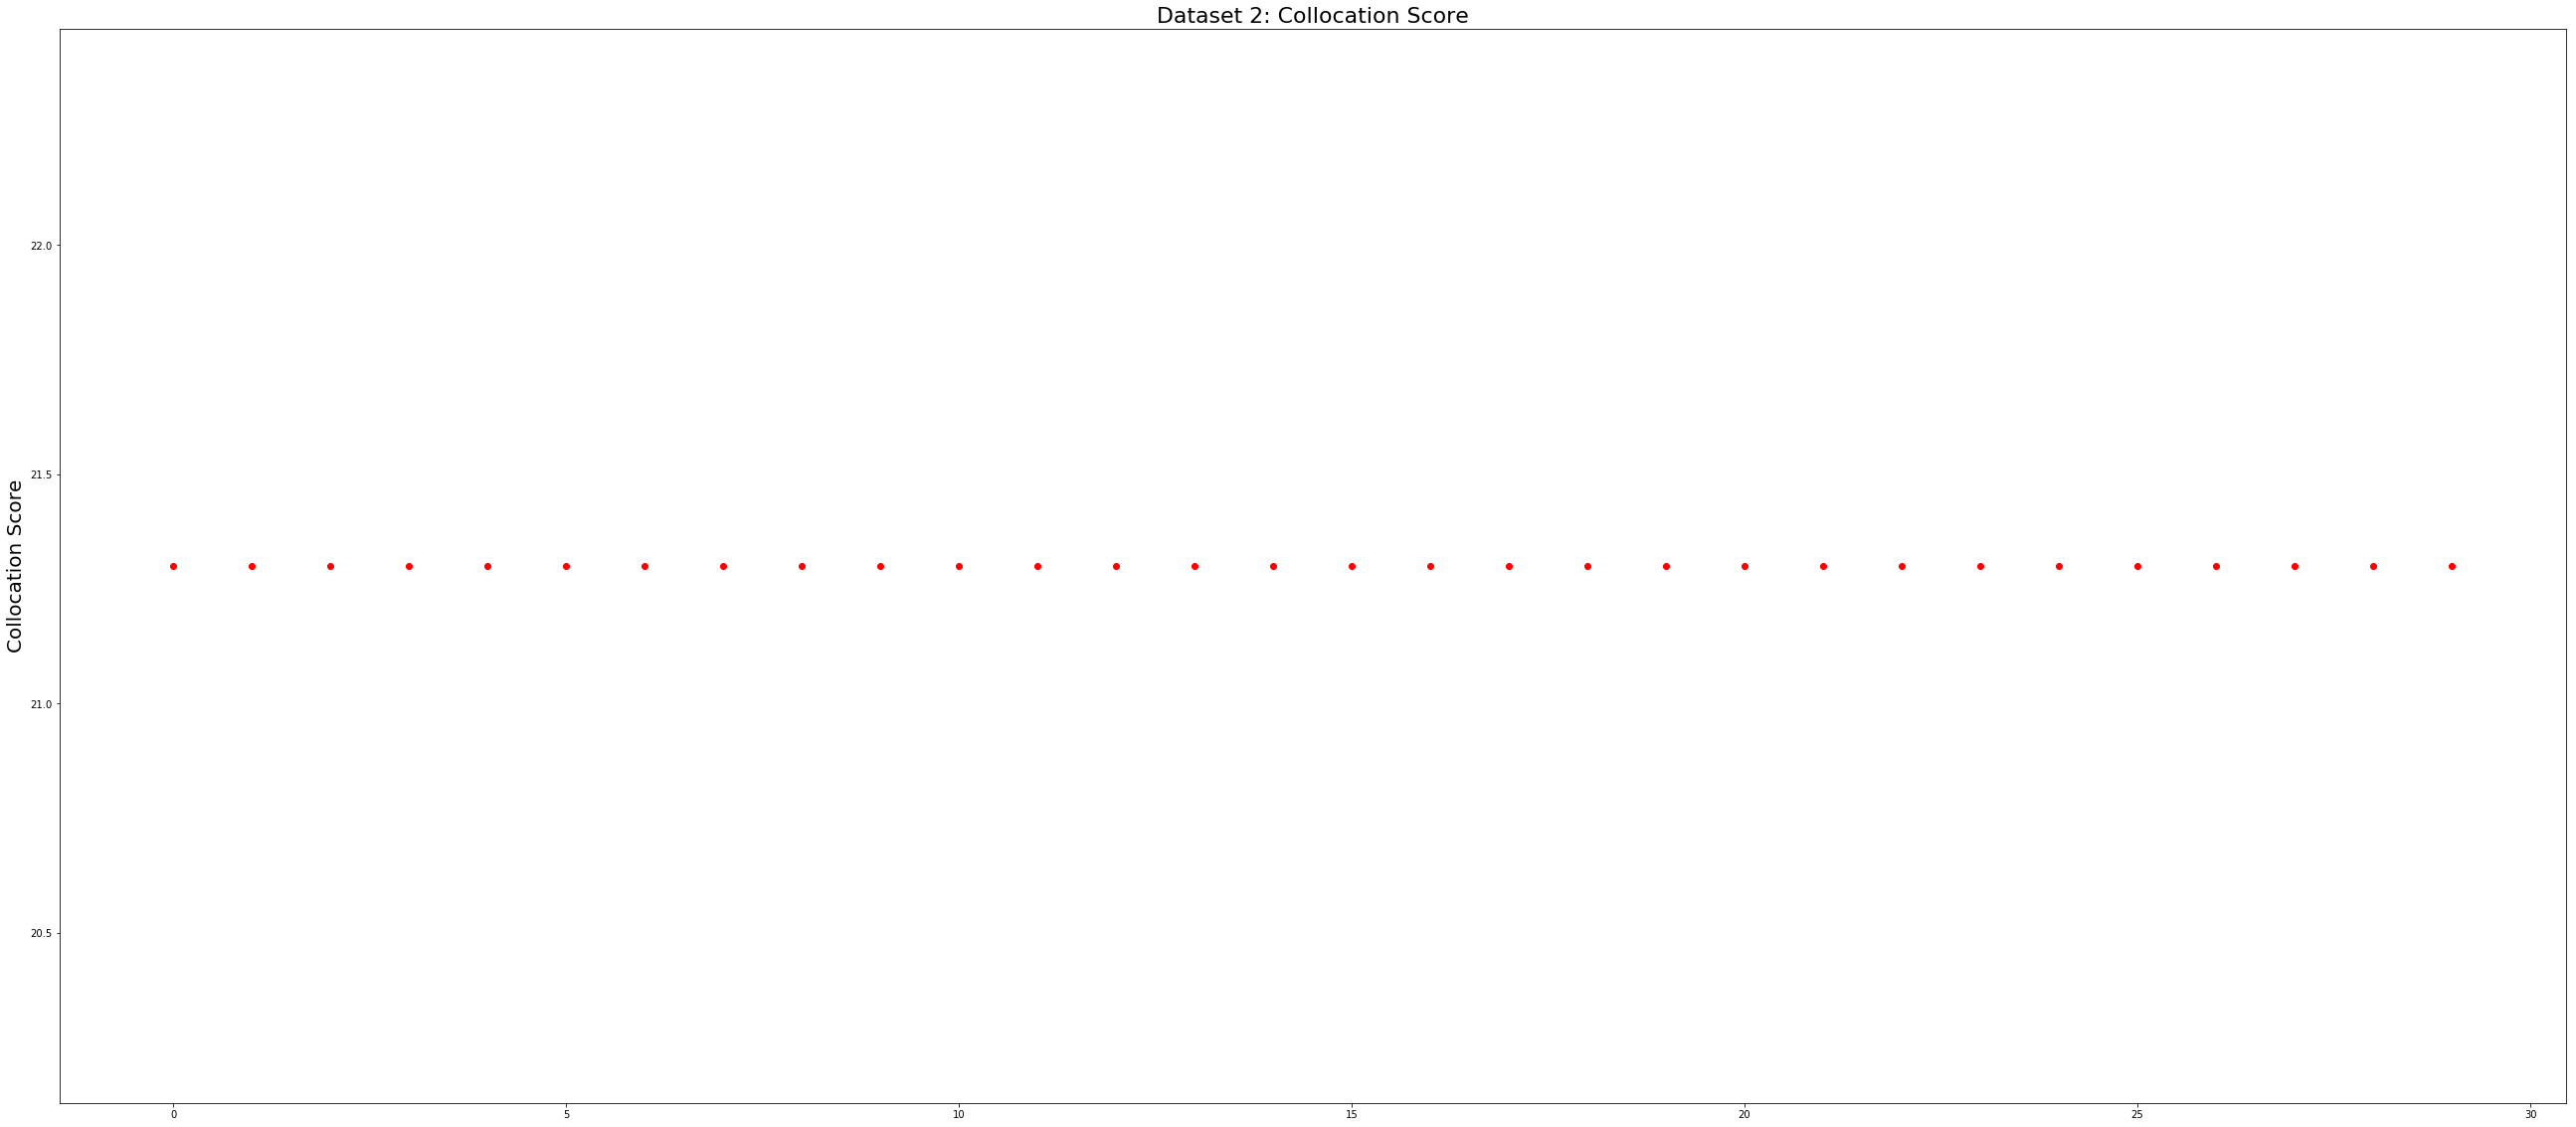

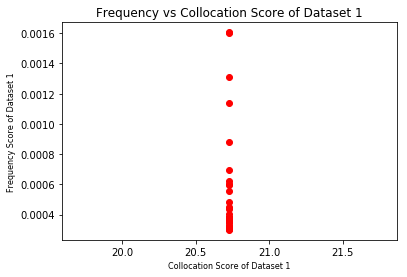

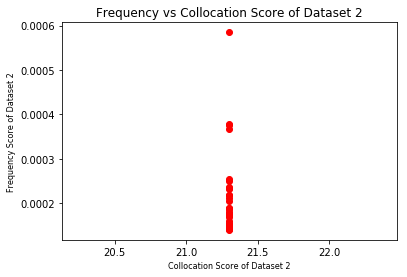

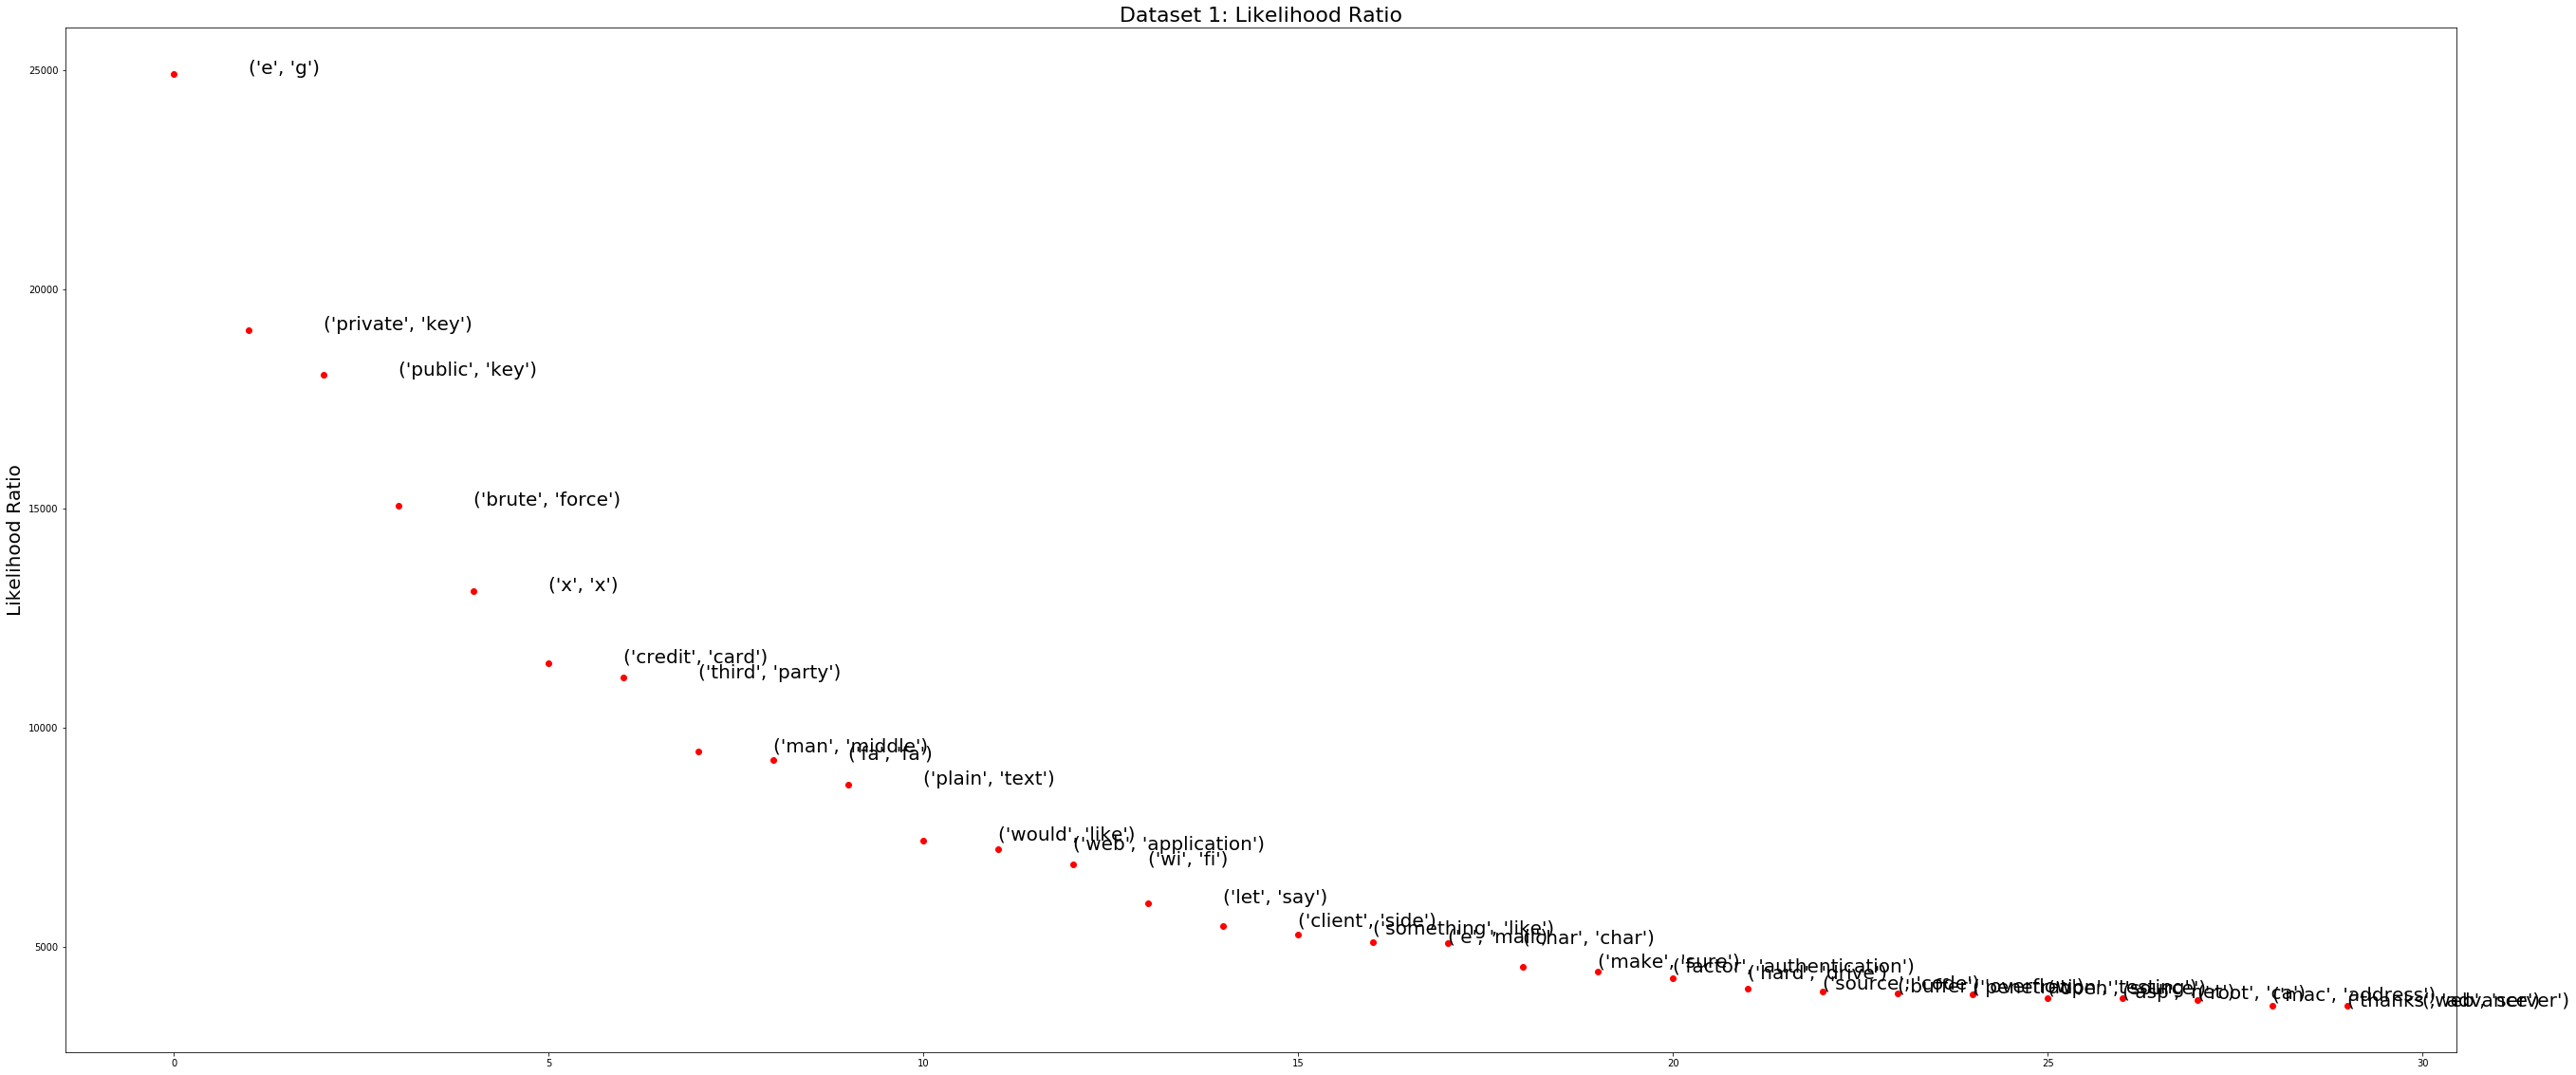

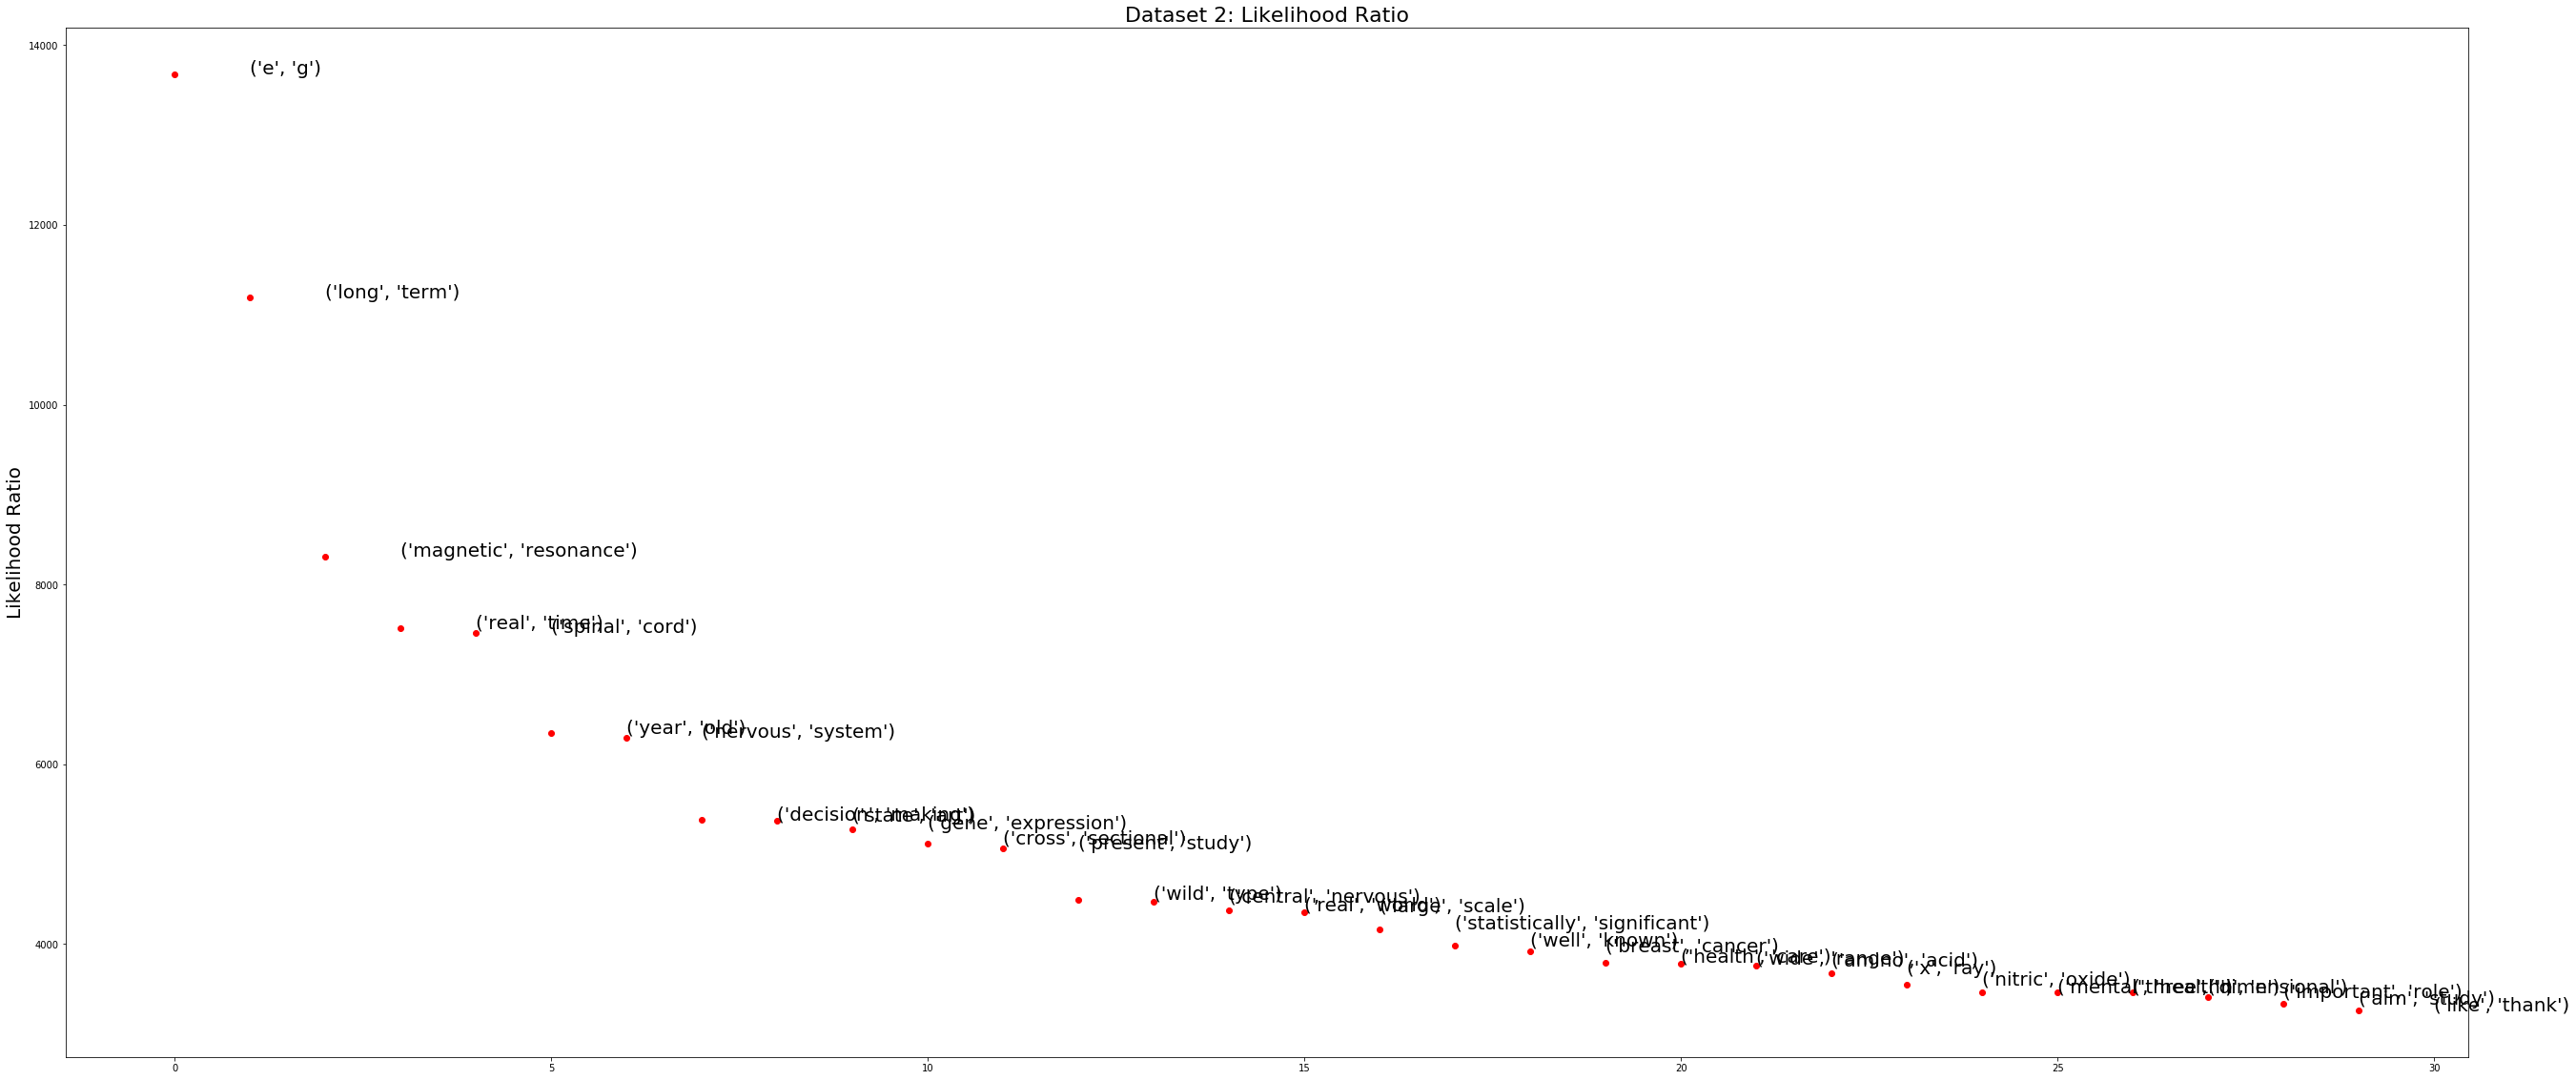

In [7]:
if __name__ == "__main__":
    main()